# Pytorch介绍
## 简介
PyTorch是一个很著名的支持GPU加速和自动求导的深度学习框架，在最近几年收到学术界的热捧，主要是因为其动态图机制符合思维逻辑，方便调试，适合于需要将想法迅速实现的研究者。PyTorch是Torch7团队开发的。Torch是一个开源科学计算框架，可以追溯到2002年纽约大学的项目。Torch的核心在于在构建深度神经网络及其优化和训练，为图像，语音，视频处理以及大规模机器学习问题提供快速高效的计算方案。为了追求更高的速度，灵活性和可扩展性，Torch采用Lua作为它的开发语言，但lua语言的受众比较局限。为了满足当今业界里Python先行(Python First)的原则，PyTorch应运而生，由Facebook人工智能研究员(FAIR)于2017年在GitHub上开源。顾名思义，PyTorch使用python作为开发语言，近年来和tensorflow, keras, caffe等热门框架一起，成为深度学习开发的主流平台之一。
## 特点
- 动态计算：这是PyTorch别于Tensorflow, caffe等框架最大的一点。神经网络在运行时定义创建，并且可以随时查看训练中的tensor值，快速学习网络。PyTorch通过变量的自动反向求导机制，可以零延迟地改变神经网络的学习行为。（Tensorflow2.0中，已经将Eager Execurion变为默认执行模式，由编写静态计算图转向动态计算图。）
- 生态：相比较于比较年轻的PyTorch，TensorFlow由于发布较早，用户基数大，社区庞大，其生态相当完整，从底层张量运算到云端模型部署，TensorFlow都可以做到。
- 适用人群：工业界需要部署效率，所以倾向于TensorFlow；学术界需要模型迭代，所以倾向于PyTorch。
- 使用难度：PyTorch的设计追求最少的封装，尽量避免重复造轮子。PyTorch的设计遵循张量(tensor)→变量(variable)→神经网络模块(nn.Module) 三个由低到高的抽象层次。不像Tensorflow中定义了许多全新而复杂的变量，对于新手来说，PyTorch更加直观，更容易深入API来理解底层代码。

下面是Pytorch和TensorFolow的对比：

在Papers with Code网站上的论文中，大部分都使用的是PyTorch框架，并且还在逐渐上升，TensorFlow的市场份额在逐年下降。
<img src="https://img.fangkaipeng.com/blog_img/20220529110034.png" alt="image-20220529110020288" style="zoom: 67%;" />

TensorFlow 自成立以来一直是面向部署的应用程序的首选框架，TensorFlow Serving和TensorFlow Lite可让用户轻松地在云、服务器、移动设备和 IoT 设备上进行部署。各大公司在招聘深度学习工程师时，大部分都要求掌握TensorFlow框架。部署便捷性上，TensorFlow完胜。
<img src="https://img.fangkaipeng.com/blog_img/20220529110038.png" alt="image-20220529110027605" style="zoom:67%;" />

总的来说，TensorFlow和PyTorch的发展前景都很友好，PyTorch在学术界非常受欢迎，作为深度学习研究者，掌握PyTorch是必要的。

## 安装

官网：https://pytorch.org/get-started/locally/

在下图中选择需要安装环境的主机的配置情况，然后使用命令行进行安装：
<img src="https://img.fangkaipeng.com/blog_img/20220529110402.png" alt="image-20220529110402081" style="zoom: 67%;" />

说明：

- PyTorch Build 中的三个选项从左往右代表稳定版，先行版，长期支持版，一般选择第一个即可。
- Package表示使用什么包管理工具安装，依据本机的Python环境选择。
- Compute Platform：表示安装GPU版还是CPU版本，只支持nvidia的显卡，如果本机没有可用显卡，就安装CPU版本，否则选择CUDA安装。注意如果要安装GPU版本，还需要安装对应的GPU驱动，包括对应的CUDA和cuDNN。参考：https://zhuanlan.zhihu.com/p/106133822

# Tensor 基础操作

Pytorch 的一大作用就是可以代替 Numpy 库，所以首先介绍 Tensors ，也就是张量，它相当于 Numpy 的多维数组(ndarrays)。两者的区别就是 Tensors 可以应用到 GPU 上加快计算速度。

##  声明和定义
首先是对 Tensors 的声明和定义方法，分别有以下几种：
- `torch.empty()`: 声明一个未初始化的矩阵。


In [1]:
import torch
# 创建一个 5*3 的矩阵
x = torch.empty(5, 3)
print(x)

tensor([[0.0000e+00, 2.1250e+00, 0.0000e+00],
        [2.0000e+00, 0.0000e+00, 1.8750e+00],
        [0.0000e+00, 1.8750e+00, 0.0000e+00],
        [2.0000e+00, 1.4013e-45, 0.0000e+00],
        [1.2645e-08, 1.5849e+29, 1.2648e-08]])


- `torch.rand()`：随机初始化一个矩阵

In [2]:
# 创建一个随机初始化的 5*3 矩阵
rand_x = torch.rand(5, 3)
print(rand_x)

tensor([[0.8061, 0.2148, 0.0076],
        [0.6700, 0.1811, 0.6901],
        [0.6279, 0.7940, 0.2799],
        [0.5806, 0.9161, 0.9525],
        [0.3730, 0.8753, 0.6000]])


- `torch.zeros()`：创建数值皆为 0 的矩阵，类似的也可以创建数值都是 1 的矩阵，调用 `torch.one`

In [3]:
# 创建一个数值皆是 0，类型为 long 的矩阵
zero_x = torch.zeros(5, 3, dtype=torch.long)
print(zero_x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


- `torch.tensor()`：直接传递 tensor 数值来创建

In [4]:
# tensor 数值是 [5.5, 3]
tensor1 = torch.tensor([5.5, 3])
print(tensor1)

tensor([5.5000, 3.0000])


## 操作(Operations)
操作也包含了很多语法，但这里作为快速入门，仅仅以加法操作作为例子进行介绍，更多的操作介绍可以点击下面网址查看官方文档，包括转置、索引、切片、数学计算、线性代数、随机数等等：
https://pytorch.org/docs/stable/torch.html

In [5]:
"""
几种加法操作：
"""
tensor3 = torch.ones(5, 3)
tensor4 = torch.ones(5, 3)

print(tensor3 + tensor4)

print(torch.add(tensor3, tensor4))

# 新声明一个 tensor 变量保存加法操作的结果
result = torch.empty(5, 3)

torch.add(tensor3, tensor4, out=result)
print(tensor3)
# 直接修改变量
tensor3.add_(tensor4)
print(tensor3)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


注意：可以改变 tensor 变量的操作都带有一个后缀 `_` , 例如 `x.copy_(y)` , `x.t_()` 都可以改变 x 变量,除了加法运算操作，对于 Tensor 的访问，和 Numpy 对数组类似，可以使用索引来访问某一维的数据。

In [6]:
"""
修改尺寸
"""
x = torch.randn(4, 4)
y = x.view(16)
# -1 表示除给定维度外的其余维度的乘积
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())
print(x)
print(y)
print(z)


torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
tensor([[ 0.9137,  1.7148,  0.5189,  1.1610],
        [ 0.1436, -1.3563, -0.3635,  0.9505],
        [ 0.9178, -0.8027, -0.5152,  0.2829],
        [ 1.0178, -0.8934,  1.6940, -0.7885]])
tensor([ 0.9137,  1.7148,  0.5189,  1.1610,  0.1436, -1.3563, -0.3635,  0.9505,
         0.9178, -0.8027, -0.5152,  0.2829,  1.0178, -0.8934,  1.6940, -0.7885])
tensor([[ 0.9137,  1.7148,  0.5189,  1.1610,  0.1436, -1.3563, -0.3635,  0.9505],
        [ 0.9178, -0.8027, -0.5152,  0.2829,  1.0178, -0.8934,  1.6940, -0.7885]])


In [28]:
"""
和 Numpy 数组的转换
"""
import numpy as np
# Tensor 转换为 Numpy 数组
a = torch.ones(5)
# 共享内存
b = a.numpy()
print(b)
b = b+1
print("b=",b)
print("a=",a)
# 新建变量
c = np.array(a)
print(c)
print(type(b))
print(type(c))
#  Numpy 数组转换为 Tensor

a = np.ones(5)
b = torch.from_numpy(a)
print(type(a))
print(type(b))


[1. 1. 1. 1. 1.]
b= [2. 2. 2. 2. 2.]
a= tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [8]:
"""
CUDA 张量（在GPU上运算tensors）
"""
# 当 CUDA 可用的时候，可用运行下方这段代码，采用 torch.device() 方法来改变 tensors 是否在 GPU 上进行计算操作

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")     # 定义一个设备对象
y = torch.ones_like(x, device=device)  # 显示创建在 GPU 上的一个 tensor
x = x.to(device)                       # 也可以采用 .to("cuda") 
z = x + y
print(z)
print(z.to("cpu", torch.double))       # .to() 方法也可以改变数值类型

tensor([[ 1.9137,  2.7148,  1.5189,  2.1610],
        [ 1.1436, -0.3563,  0.6365,  1.9505],
        [ 1.9178,  0.1973,  0.4848,  1.2829],
        [ 2.0178,  0.1066,  2.6940,  0.2115]])
tensor([[ 1.9137,  2.7148,  1.5189,  2.1610],
        [ 1.1436, -0.3563,  0.6365,  1.9505],
        [ 1.9178,  0.1973,  0.4848,  1.2829],
        [ 2.0178,  0.1066,  2.6940,  0.2115]], dtype=torch.float64)


## autograd 自动求导
对于 Pytorch 的神经网络来说，非常关键的一个库就是 `autograd` ，它主要是提供了对 `Tensors` 上所有运算操作的自动微分功能，也就是计算梯度的功能。它属于 `define-by-run` 类型框架，即反向传播操作的定义是根据代码的运行方式，因此每次迭代都可以是不同的。

接下来会简单介绍一些例子来说明这个库的作用。

`torch.Tensor` 是 Pytorch 最主要的库，当设置它的属性 `.requires_grad=True`，那么就会开始追踪在该变量上的所有操作，而完成计算后，可以调用 `.backward()` 并自动计算所有的梯度，得到的梯度都保存在属性 `.grad` 中。

而如果是希望防止跟踪历史（以及使用内存），可以将代码块放在 `with torch.no_grad():` 内，这个做法在使用一个模型进行评估的时候非常有用，因为模型会包含一些带有 `requires_grad=True` 的训练参数，但实际上并不需要它们的梯度信息。

对于 `autograd` 的实现，还有一个类也是非常重要-- `Function` 。

`Tensor` 和 `Function` 两个类是有关联并建立了一个非循环的图，可以编码一个完整的计算记录。每个 `tensor` 变量都带有属性 `.grad_fn` ，该属性引用了创建了这个变量的 `Function` （除了由用户创建的 `Tensors`，它们的 `grad_fn=None` )。

如果要进行求导运算，可以调用一个 `Tensor` 变量的方法 `.backward()` 。如果该变量是一个标量，即仅有一个元素，那么不需要传递任何参数给方法 `.backward()`，当包含多个元素的时候，就必须指定一个 `gradient` 参数，表示匹配尺寸大小的 `tensor`，其本质就是计算雅克比向量(vector-Jacobian)乘积。

In [32]:
import torch
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
print(y)
z = y * y * 3
print(z)
out = z.mean()
print(out)
out.backward()
print(x.grad)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [31]:
# 训练train backward 验证/评估的时候不需要梯度
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


# 数据加载
Pytorch的数据加载主要依赖`torch.utils.data.Dataset`和`torch.utils.data.DataLoader`两个模块，可以完成如下格式的傻瓜式加载
``` python
train_dataset = MyDataset(train_data_path) # 'MyDataset' 是 'torch.utils.data.Dataset' 的继承
train_loader = torch.utils.data.DataLoader(train_dataset)   
```
## Dataset介绍
在`torch.utils.data.Dataset`中我们可以查看`Dataset`的源码 ：
``` python
class Dataset(Generic[T_co]):
    def __getitem__(self, index) -> T_co:
        raise NotImplementedError

    def __add__(self, other: 'Dataset[T_co]') -> 'ConcatDataset[T_co]':
        return ConcatDataset([self, other])
```

Pytorch中，任何基于索引读取数据的类均需继承torch.utils.data.Dataset，该类为数据的读取定义了格式。继承后的子类必须重写`__getitem__()`函数，以此通过给定索引获取对应数据；可以有选择性地重写`__len__()`函数以返回数据集的大小。

重写 `__getitem__()` 函数后，我们就可以用索引直接访问对应的数据，如 `data[0]` 表示获取第一个数据。

重写 `__len__()` 函数后，我们可以使用 `len(data)` 来获取数据集的大小，即数据条数。
## Dataloader 介绍
DataLoader为我们提供了对Dataset的读取操作，常用参数有：
- `batch_size`(每个batch的大小)，即每轮训练使用的数据条数
- `shuffle`(True or False，表示是否进行洗牌打乱操作)，一般训练集设为True，验证集和测试集设为False
- `num_workers`(int类型，表示加载数据的时候使用几个子进程)，默认为0，表示使用主进程，推荐和CPU核的个数相同，理论上进程越多加载越块。

举例：

``` python
dl = torch.utils.data.DataLoader(ds_demo, batch_size = 10, shuffle = True, num_workers = 0)
# DataLoader返回的是一个可迭代对象，我们可以使用迭代器分次获取数据

idata = iter(dl)
print(next(idata))

# 常见的用法是使用for循环对其进行遍历
for i, data in enumerate(dl):
    print(i, data)
```
## 内置数据集
`torchvision.datasets` 可以理解为PyTorch团队自定义的dataset，这些dataset帮我们提前处理好了很多计算机视觉相关的数据集，我们拿来就可以直接使用，具体参见官方文档：https://pytorch.org/vision/stable/datasets.html?highlight=datasets

同样，也有音频和文本数据集，分别在`torchaudio.datasets` 和 `torchtext.dataset` 下。

`torchvision.datasets` 中的 `dataset` 声明对象时，常用的参数有：
- `root` : 表示数据存储的路径。
- `train` : 布尔类型，表示当前声明的dataset是训练集还是测试集。
- `transform` : 对数据的转换，下一节会介绍
- `target_transfor`：对label的转换
- `download` : 布尔类型，表示是否下载数据集，如果 `root` 下已经存在数据集，则可以设为 False

举例：
``` python
train_data = datasets.CIFAR10(root="../Dataset/CIFAR10", train=True, transform=transform, download=True)  # 训练集
test_data = datasets.CIFAR10(root="../Dataset/CIFAR10", train=False, transform=transform, download=True)  # 测试集
```
使用上述方法，则可以得到对应的`Dataset` 对象，然后使用`DataLoader`装载数据集。

## ImageFolder
上面说了可以使用重载 `Dataset` 的方式载入自己的数据集，也可以使用 `datasets` 中官方预设的数据集，此外，还可以使用 `ImageFolder` 快速加载一个自己的数据集，`ImageFolder` 假设所有的文件按文件夹保存，每个文件夹下存储同一个类别的图片，文件夹名为类名，比如：
``` 
        root/dog/xxx.png
        root/dog/xxy.png
        root/dog/[...]/xxz.png

        root/cat/123.png
        root/cat/nsdf3.png
        root/cat/[...]/asd932_.png
```
声明一个 `ImageFolder` ，常用的参数有：

- `root`：在root指定的路径下寻找图片
- `transform`：对PIL Image进行的转换操作，transform的输入是使用loader读取图片的返回对象
- `target_transform`：对label的转换
- `loader`：给定路径后如何读取图片，默认读取为RGB格式的PIL Image对象

`ImageFolder` 的上层父类是 `Dataset`，所以可以直接当做`Dataset`使用，此外，它也有自己的一些特殊属性：

- `classes (list)`: 返回按字典序排列后的种类名称
- `class_to_idx (dict)`: 返回一个字典，表示类名和类编号的映射
- `imgs (list)`: 返回一个list，每个元素是一个tuple，由图片路径和所属类别编号组成

## 示例

In [37]:
"""
内置数据集的使用
"""
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

train_data = datasets.CIFAR10(root="./dataset", train=True, transform=transform, download=False)  # 训练50000张
test_data = datasets.CIFAR10(root="./dataset", train=False, transform=transform, download=False)  # 测试10000张
len(train_data)
train_data[0]
#print(train_data.class_to_idx)
#type(train_data[1])
#plt.imshow(train_data[1][0].numpy().transpose(1, 2, 0))


{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [38]:
"""
ImageFolder的使用：
"""
train_dataset = datasets.ImageFolder(root="./dataset/flower_data/train")
val_dataset = datasets.ImageFolder(root="./dataset/flower_data/val")
print(train_dataset.class_to_idx)
print(train_dataset.imgs[5])
print(train_dataset.imgs[2000])
print(type(train_dataset[0]))
train_dataset[2200][0].show()

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
('./dataset/flower_data/train/daisy/102841525_bd6628ae3c.jpg', 0)
('./dataset/flower_data/train/sunflowers/14623719696_1bb7970208_n.jpg', 3)
<class 'tuple'>


# 数据预处理
transforms 是图像处理函数，主要用于对索引出来的图片进行 剪切、翻转、平移、仿射等操作，也就是得到我们想要的预处理过程。pytorch 提供的 torchvision.transforms 模块是专门用来进行图像预处理的，主要可以分为以下几种：
- 不同形式图像之间的转换
- transforms——裁剪
- transforms——翻转和旋转

## 图像形式转换
主要是 PILImage,numpy,Tensor间相互转换。

PILImage是Python图像库PIL(Python Image Library)中的一个类，这是python的第三方图像处理库，但是由于其强大的功能与众多的使用人数，几乎已经被认为是python官方图像处理库了。
### ToTensor()
使用 `torchvision.transforms.ToTensor()` 将PILImage或者numpy的ndarray转化成Tensor
- 对于PILImage转化的Tensor，其数据类型是`torch.FloatTensor`
- 对于ndarray的数据类型没有限制，但转化成的Tensor的数据类型是由ndarray的数据类型决定的。

In [39]:
# PILImage -> tensor
from PIL import Image
img1 = Image.open('./demo.jpg')
img1.show()
PtoT = transforms.ToTensor()(img1)
print(type(PtoT))
PtoT.shape

<class 'torch.Tensor'>


torch.Size([3, 247, 330])

In [16]:
# ndarray -> tensor
n_out = np.random.rand(100,100,3)
print(n_out.dtype)
t_out = transforms.ToTensor()(n_out)
print(t_out.type())
print(t_out.shape)

float64
torch.DoubleTensor
torch.Size([3, 100, 100])


### ToPILImage()

将Numpy的ndarray或者Tensor转化成PILImage类型【在数据类型上，两者都有明确的要求】

- `ndarray` 的数据类型要求 `dtype=uint8`, range`[0, 255]` and shape H x W x C
- `Tensor` 的 `shape` 为 C x H x W 要求是FloatTensor的，不允许`DoubleTensor`或者其他类型

In [40]:
# ndarray -> PILimage
data = np.random.randint(0, 255, 30000)
print(data.dtype)
n_out = data.reshape(100,100,3)
 
#强制类型转换
n_out = n_out.astype(np.uint8)
print(n_out.dtype)
 
img2 = transforms.ToPILImage()(n_out)
img2.show()


int64
uint8


In [41]:
# tensor -> PILImage
t_out = torch.randn(3,300,300)
img1 = transforms.ToPILImage()(t_out.float())
img1.show()

## 裁剪 Crop
主要有：
- 中心裁剪： `transforms.CenterCrop()`
- 随机裁剪： `transforms.RandomCrop()`
- 随机长宽比裁剪： `transforms.RandomResizedCrop()`
- 上下左右中心裁剪： `transforms.FiveCrop()`
- 上下左右中心裁剪后翻转: `transforms.TenCrop()`
## 翻转和旋转 Flip and Rotation
- 依概率 p 水平翻转： `transforms.RandomHorizontalFlip(p=0.5)`
- 依概率 p 垂直翻转： `transforms.RandomVerticalFlip(p=0.5)`
- 随机旋转：`transforms.RandomRotation()`
## 图像变换
- resize： `transforms.Resize`
- 标准化： `transforms.Normalize`
- 转为 tensor，并归一化至[0-1]： `transforms.ToTensor`
- 填充： `transforms.Pad`
- 修改亮度、对比度和饱和度： `transforms.ColorJitter`
- 转灰度图： `transforms.Grayscale`
- 线性变换： `transforms.LinearTransformation()`
- 仿射变换： `transforms.RandomAffine`
- 依概率 p 转为灰度图： `transforms.RandomGrayscale`

具体使用不进行演示，可以参见：https://blog.csdn.net/Deep_bluce/article/details/111475411

## Compose()
transform 方法是一个类，我们有两种处理方式，一个是实例化这个 transform 类，然后把图片传入，另一种方式是实例化一个 transforms.Compose() 类。然后对 transforms.Compose 的实例传入图像处理。区别是如果直接实例化 transform 类，一次只能对图像做一种 transform 操作。但是 transforms.Compose() 类支持传入多个 transform 类，即一个 transforms.Compose() 包含多个 transform 类，这样 一次性能够实现多个操作，如下示例中两种写法等价：
``` python
import torchvision.transforms as transforms
pic = imread('...')
#---------方 法 1---------- 一次一种处理方式
transform = transforms.CenterCrop(720)  # 中心裁剪
picProcessed1 = transform(pic)
transform = transforms.RandomHorizontalFlip(p=0.5)  # 随机水平翻转
picProcessed2 = transform(picProcessed1)

#---------方 法 2----------一步到位
transform = transforms.Compose([
    transforms.CenterCrop(720)
    transforms.RandomHorizontalFlip(p=0.5)
    ])
picProcessed = transform(pic)

```


- torch.nn.Parameter：这是一个**类**，其本质也是一个`Tensor`，只不过被当做模型的参数。即`model.parameters()`会包含这个`parameter`。从而，在参数优化的时候可以自动一起优化，这就不需要我们单独对这个参数进行优化，注意的是 `nn.Parameter`=`nn.parameter.Parameter`
- torch.nn.Sequential：一个顺序的容器，将模组添加到里面，在前向传播时，会按照添加的顺序逐一执行容器内的模组。
- torch.nn.Module：所有神经网络模组的基类，Pytorch中所有的神经网络都要继承于这个类。

# 模型搭建 torch.nn
nn全称为neural network，意思是神经网络，是torch中构建神经网络的模块
## torch.nn.functional
该模块包含构建神经网络需要的**函数**，包括卷积层、池化层、激活函数、损失函数、全连接函数等，具体查看官方文档：https://pytorch.org/docs/stable/nn.functional.html#convolution-functions

注意这个模块中只包含了函数，所谓函数就是输入数据得到对应的输出，只是简单的数学运算，没有自动更新权重的能力，与后面介绍的Modules不太一样。

卷积操作举例如下：
<img src="https://img.fangkaipeng.com/blog_img/image-20220329101340071.png" alt="image-20220329101340071" style="zoom:50%;" />

下面用`torch.nn.functional.conv2d`模拟一下上图的卷积操作：

需要注意的是，在Pytorch中，只要是nn下的包都只支持 mini-batch ，即输入和输出的数据是4维的，每一维度分别表示：(batch大小，输入通道数，高度，宽度)，即`N*C*H*W`，即使只有一张单通道的黑白图片，也要转变为 `1*1*H*W`的形式。
> `torch.nn` only supports mini-batches. The entire `torch.nn` package only supports inputs that are a mini-batch of samples, and not a single sample.
>
> > For example, `nn.Conv2d` will take in a 4D Tensor of `nSamples * nChannels * Height * Width`.
> > If you have a single sample, just use `input.unsqueeze(0)` to add a fake batch dimension.

In [42]:
import torch
import torch.nn.functional as F
 
x = torch.tensor([[1,2,0,3,1],
                    [0,1,2,3,1],
                    [1,2,1,0,0],
                     [5,2,3,1,1],
                    [2,1,0,1,1]])
kernal = torch.tensor([[1,2,1],
                      [0,1,0],
                      [2,1,0]])
x = torch.reshape(x,[1,1,5,5]) # 拓展成四维
kernal = torch.reshape(kernal,[1,1,3,3])
out = F.conv2d(x, kernal, stride=1)
out

tensor([[[[10, 12, 12],
          [18, 16, 16],
          [13,  9,  3]]]])

## torch.nn.Module
pytorch中其实一般没有特别明显的Layer和Module的区别，不管是**自定义层**、自定义块、**自定义模型**，都是通过继承Module类完成的。其实Sequential类也是继承自Module类的。

torcn.nn是专门为神经网络设计的模块化接口。构建于autograd之上，可以用来定义和运行神经网络。

torch.nn.Module 是所有神经网络单元的基类，包含网络各层的定义及forward方法。

pytorch里面一切自定义操作基本上都是继承nn.Module类来实现的。

在pytorch里面自定义层也是通过继承自nn.Module类来实现的。pytorch里面一般是没有层的概念，层也是当成一个模型来处理的。

下面是`Module`中的一些主要函数：

``` python

class Module(object):
    def __init__(self):
    def forward(self, *input): # 前向传播
 
    def add_module(self, name, module): # 添加模块
    def cuda(self, device=None): # 将模型放入GPU
    def cpu(self): # 将模型放入CPU
    def __call__(self, *input, **kwargs):  # 实现对象函数化
    # 返回参数
    def parameters(self, recurse=True):
        """
         Example::

            >>> for param in model.parameters():
            >>>     print(type(param), param.size())
            <class 'torch.Tensor'> (20L,)
            <class 'torch.Tensor'> (20L, 1L, 5L, 5L)
        """
    # 当一个迭代器，可以迭代得到模型的参数，返回的是元组类型（参数名称，参数对象）
    def named_parameters(self, prefix='', recurse=True): 
    def children(self):
    def named_children(self):
    def modules(self): # 返回网络中的所有模组
        """
          Example::

                >>> l = nn.Linear(2, 2)
                >>> net = nn.Sequential(l, l)
                >>> for idx, m in enumerate(net.modules()):
                        print(idx, '->', m)

                0 -> Sequential(
                  (0): Linear(in_features=2, out_features=2, bias=True)
                  (1): Linear(in_features=2, out_features=2, bias=True)
                )
                1 -> Linear(in_features=2, out_features=2, bias=True)
        """
    def named_modules(self, memo=None, prefix=''):
    def train(self, mode=True): # 训练模式
    def eval(self): # 评估模式
    def zero_grad(self): # 将模型参数的所有梯度置为0
    def __repr__(self): # 使示例化的对象可以用repr()输出
    def __dir__(self): # 返回所有的属性名和方法名

```

## CNN的基本层
### Convolution Layers
详情见官方文档：https://pytorch.org/docs/stable/nn.html#convolution-layers

Pytorch中实现了很多常用的卷积层，对于图像处理的卷积神经网络来说，最常用的就是 `nn.Conv2d`，即二维卷积层，这里也以此为例。

`nn.Conv2d` 也是一个类，继承自 `_ConvNd` ，而 `_ConvNd` 又继承自 `Module`。

声明时主要参数：
`torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)`
- **in_channels** (int) – 输入图像的通道数
- **out_channels** (int) – 卷积层输出通道数
- **kernel_size** (int *or* tuple) – 卷积核大小
- **stride** (int *or* tuple*,* *optional*) – 卷积核步长
- **padding** (int*,* tuple *or* str*,* *optional*) – 在外层填充圈数，Default: 0
- **dilation** (int *or* tuple*,* *optional*) – 卷积核中挖洞，Default: 1（表示不挖洞）
- **bias** (bool*,* *optional*) – 是否添加偏置项 Default: `True`

其中输入图像和输出图像的大小计算方式如下图：
<img src="https://img.fangkaipeng.com/blog_img/20220529200616.png" alt="image-20220529200616007" style="zoom:50%;" />

In [23]:
import torch.nn as nn
# With square kernels and equal stride
conv = nn.Conv2d(16, 33, 3, stride=2, padding=2)
input = torch.randn(20, 16, 50, 100)
print(input.shape)
output = conv(input) ## __call__实习对象函数式调用
output.shape

torch.Size([20, 16, 50, 100])


torch.Size([20, 33, 26, 51])

### Pooling layers
具体见官方文档：https://pytorch.org/docs/stable/nn.html#pooling-layers

实现了常用的池化层，如最大池化，平均池化等。以 `nn.MaxPool2d` 为例：

池化层主要是用于缩小图片的维度，减少冗余特征，从而加快训练速度，经过池化层处理后的图像一般通道数不变，只会改变长宽。

主要参数如下：

- kernel_size – the size of the window to take a max over

- stride – the stride of the window. Default value is kernel_size

- padding – implicit zero padding to be added on both sides

- dilation – a parameter that controls the stride of elements in the window

参数含义类似卷积层，不详细解释，输入输出图像的长宽计算公式：

<img src="https://img.fangkaipeng.com/blog_img/20220530072457.png" alt="image-20220530072414394" style="zoom:50%;" />

可以看出，计算公式和卷积相同，区别在于卷积层输出的通道数等于卷积个数，池化层输出通道数和输入的相同。

In [43]:
# pool of square window of size=3, stride=2
MaxPool2d = nn.MaxPool2d(3, stride=2)
input = torch.randn(20, 16, 50, 32)
output = MaxPool2d(input)
output.shape

torch.Size([20, 16, 24, 15])

### 一些其他常用的层 
- Non-linear Activations,非线性激活层，比如 `nn.ReLU` `nn.Tanh` `nn.LogSigmoid` 等，其中部分可以设置参数 `inplace`，True表示在原数据上操作，False表示新建一个对象计算。
- Normalization Layers，归一化层
- Linear Layers，线性变换层，主要用于改变维度
- Dropout Layers，随机失活层，主要参数 `p` 表示失活概率
- nn.Flatten,展平tensor

## 搭建一个简易CNN
我们在定义自已的网络的时候，需要继承 `nn.Module` 类，并重新实现构造函数 `__init__` 构造函数和 `forward` 这两个方法。继承 `nn.Module` 类在自定义类时即可实现，注意在构造函数中也需要先调用父类的构造函数，forward 接受输入进行前向传播后返回输出结果，由于`model`类实现了 `__call__` ，所以可以直接使用 `对象名()` 的方式进行前向传播，具体如下：

In [31]:
import torch.nn as nn
import torch
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        
    
    def forward(self,input):
        output = input + 1
        return output
    
model = Model()
x = torch.tensor(1)
model(x)

tensor(2)

在实现`__init__` 和 `forward` 时有一些注意技巧：

（1）一般把网络中具有可学习参数的层（如全连接层、卷积层等）放在构造函数 `__init__()` 中，当然我也可以把不具有参数的层也放在里面；

（2）一般把不具有可学习参数的层(如ReLU、dropout、BatchNormanation层)可放在构造函数中，也可不放在构造函数中，如果不放在构造函数`__init__`里面，则在 `forward` 方法里面可以使用 `nn.functional` 来代替。

（3）`forward` 方法是必须要重写的，它是实现模型的功能，实现各个层之间的连接关系的核心。

是否将不具有参数的层放入构造函数的区别在于，只有在构造函数中的层才属于模型的层，其参数才会在训练时被更新，而有些层本来就没有参数无需训练，所以可以不用放在构造函数内，只要在 `forward` 中实现即可，比如：

In [32]:

import torch
 
class MyNet(torch.nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()  # 第一句话，调用父类的构造函数
        self.conv1 = torch.nn.Conv2d(3, 32, 3, 1, 1)
        self.relu1=torch.nn.ReLU()
        self.max_pooling1=torch.nn.MaxPool2d(2,1)
 
        self.conv2 = torch.nn.Conv2d(3, 32, 3, 1, 1)
        self.relu2=torch.nn.ReLU()
        self.max_pooling2=torch.nn.MaxPool2d(2,1)
 
        self.dense1 = torch.nn.Linear(32 * 3 * 3, 128)
        self.dense2 = torch.nn.Linear(128, 10)
 
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.max_pooling1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.max_pooling2(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return x
 
model = MyNet()
print(model)

MyNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (max_pooling1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (max_pooling2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (dense1): Linear(in_features=288, out_features=128, bias=True)
  (dense2): Linear(in_features=128, out_features=10, bias=True)
)


In [33]:
import torch
import torch.nn.functional as F
 
class MyNet(torch.nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()  # 第一句话，调用父类的构造函数
        self.conv1 = torch.nn.Conv2d(3, 32, 3, 1, 1)
        self.conv2 = torch.nn.Conv2d(3, 32, 3, 1, 1)
 
        self.dense1 = torch.nn.Linear(32 * 3 * 3, 128)
        self.dense2 = torch.nn.Linear(128, 10)
 
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return x
 
model = MyNet()
print(model)


MyNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dense1): Linear(in_features=288, out_features=128, bias=True)
  (dense2): Linear(in_features=128, out_features=10, bias=True)
)


## torch.nn.parameter
torch.nn.Parameter是继承自torch.Tensor的子类，其主要作用是作为nn.Module中的可训练参数使用。它与torch.Tensor的区别就是nn.Parameter会自动被认为是module的可训练参数，即加入到parameter()这个迭代器中去；而module中非nn.Parameter()的普通tensor是不在parameter中的。nn.Parameter的对象的requires_grad属性的默认值是True，即是可被训练的，这与torth.Tensor对象的默认值相反。在nn.Module类中，pytorch也是使用nn.Parameter来对每一个module的参数进行初始化的。以nn.Linear为例：

In [34]:
class NN_Network(nn.Module):
    def __init__(self,in_dim,hid,out_dim):
        super(NN_Network, self).__init__()
        self.linear1 = nn.Linear(in_dim,hid)
        self.linear2 = nn.Linear(hid,out_dim)
        
        self.linear1.weight = torch.nn.Parameter(torch.zeros(in_dim,hid))
        self.linear1.bias = torch.nn.Parameter(torch.ones(hid))
        self.linear2.weight = torch.nn.Parameter(torch.zeros(in_dim,hid))
        self.linear2.bias = torch.nn.Parameter(torch.ones(hid))

    def forward(self, input_array):
        h = self.linear1(input_array)
        y_pred = self.linear2(h)
        return y_pred

in_d = 5
hidn = 2
out_d = 3
net = NN_Network(in_d, hidn, out_d)

# 读取parameters，因为net.parameters是个生成器，所以需要去遍历输出
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], requires_grad=True)
Parameter containing:
tensor([1., 1.], requires_grad=True)
Parameter containing:
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], requires_grad=True)
Parameter containing:
tensor([1., 1.], requires_grad=True)


## torch.nn.Sequential
前面搭建一个简易CNN的章节中，定义了很多层，然后再 `forward` 实现时需要将这些层连接起来（前一层输出作为后一层输入），这样比较繁琐，对此我们可以使用 `Sequential` 来实现层的“打包”。

主要有三种使用方法：

``` python
************torch.nn.Sequential************
-------顺序容器

#写法一：
net = nn.Sequential(
    nn.Conv2d(1, 20, 5)
)

#写法二：
net = nn.Sequential()
net.add_module('conv2d', nn.Conv2d(1, 20, 5))

#写法三：
from collections import OrderedDict

net = nn.Sequential(OrderedDict([
   ('conv2d', nn.Conv2d(1, 20, 5))
    #.....
    
]))

```

示例如下：

In [35]:
class Net(nn.Module):
    def __init__(self,in_dim,hid,out_dim):
        super(Net, self).__init__()
        self.layer = torch.nn.Sequential(
            nn.Conv2d(1, 20, 5),
            nn.ReLU(),
            nn.Conv2d(10, 20, 5),
            nn.ReLU(),
        )
        
    def forward(self, x):
        ouput = self.layer(x)
        return ouput

# 模型训练

Pytorch中模型训练步骤还是非常清晰的：

- 数据载入及处理
- 模型定义
- 超参数设置（损失函数定义、优化器定义、训练轮数）
- 训练模型
  - 读取一个batch的数据，并前向传播
  - 计算损失值
  - 反向传播计算梯度
  - 优化器优化模型
  - 循环执行上述过程直到规定轮数
- 评估模型（非必须）
- 测试模型

其中除了损失函数和优化器的定义和使用没有提到，其余内容在前文都有介绍，下面直接搭建一个CNN网络，展示一个网络的完整训练流程：


In [38]:
"""
依赖包载入、数据集载入和划分
以CIFAR10作为模型训练的数据集，训练集50000张，测试集10000张图片
"""
import torchvision
import torch.nn as nn
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)
# 准备数据集
train_data = datasets.CIFAR10(root="./dataset", train=True, transform=transform, download=True)
test_data = datasets.CIFAR10(root="./dataset", train=False, transform=transform, download=True)

# length
train_data_size = len(train_data)
test_data_size = len(test_data)
print("训练数据集长度为：{} \n验证数据集的长度为：{}".format(train_data_size, test_data_size))



# 利用DataLoader加载数据集
train_dataloader = DataLoader(train_data, shuffle=True,batch_size=32, num_workers= 15)
test_dataloader = DataLoader(test_data, shuffle=False,batch_size=10000, num_workers= 15)

# test_iter = iter(test_dataloader)
# test_imgs, test_labels = test_iter.next()
# test_imgs.shape
# test_imgs = test_imgs.to(device)
# test_labels = test_labels.to(device)

Files already downloaded and verified
Files already downloaded and verified
训练数据集长度为：50000 
验证数据集的长度为：10000


In [39]:
"""
搭建LeNet网络
"""
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 16, 5),  # input_size:[3,32,32]     out_size: [16,28,28]
            nn.Sigmoid(),
            nn.AvgPool2d(2),  # input_size: [16,28,28]   out_size: [16,14,14]
            nn.Conv2d(16, 32, 5),  # input_size: [16,14,14]    out_size: [32,10,10]
            nn.Sigmoid(),
            nn.AvgPool2d(2),  # input_size: [32,10,10]   out_size: [32,5,5]
            nn.Flatten(),  # 矩阵展开
            nn.Linear(32 * 5 * 5, 120), nn.Sigmoid(),
            nn.Linear(120, 84), nn.Sigmoid(),
            nn.Linear(84, 10)
        )

    def forward(self, x):
        x = self.model(x)
        return x


In [40]:
"""
训练模型
"""
from tqdm import tqdm
import sys
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet()
model = model.to(device)  # 设置在GPU中训练

# 损失函数
loss_fn = nn.CrossEntropyLoss().to(device)

# 优化器
learning_rate = 0.005
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# 设置训练网络的参数
epochs = 30

# 添加tensorboard
#writer = SummaryWriter("./logs_train_CIFAR10")
# 开始训练 
best= 0
for epoch in range(epochs):
    print("-------第 {} 轮训练开始-------".format(epoch+1))
    train_bar = tqdm(train_dataloader, file=sys.stdout)
    model.train() #网络中有特殊层的时候需要加上，具体看文档，但加上不会出错
    running_loss = 0.0
    for step,data in enumerate(train_bar):
        imgs, targets = data
        imgs = imgs.to(device)
        targets = targets.to(device)
        outputs = model(imgs)
        loss = loss_fn(outputs, targets)
        
        # 优化器优化模型
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        train_bar.desc = "train epoch[{}/{}] loss:{:.3f}".format(epoch + 1,epochs, loss)
        
    # 测试步骤开始
    model.eval() # 网络中有特殊层的时候需要加上，具体看文档，但加上不会出错
    total_test_loss = 0
    total_accuracy = 0
    with torch.no_grad(): # 取消梯度跟踪，进行测试 重要！！！
        for data in test_dataloader:
            imgs, targets = data
            imgs = imgs.to(device)
            targets = targets.to(device)
            outputs = model(imgs)
            print(outputs.shape)
            loss = loss_fn(outputs, targets)
            total_test_loss = total_test_loss + loss.item()
            accurcy = (torch.max(outputs, dim=1)[1] == targets).sum().item()
            total_accuracy = total_accuracy + accurcy
            
    print('[epoch %d] train_loss: %.3f  val_accuracy: %.3f' %
              (epoch + 1, running_loss / len(train_dataloader), total_accuracy/test_data_size))
    if best < total_accuracy/test_data_size:
        best = total_accuracy/test_data_size
        torch.save(model.state_dict(), "./Model/LeNet_{}.path".format(epochs))
    
# 保存每一次训练的模型
print("------训练完毕-------")
# writer.close()

-------第 1 轮训练开始-------
train epoch[1/30] loss:1.733: 100%|█████████| 1563/1563 [01:12<00:00, 21.43it/s]


KeyboardInterrupt: 

# 模型预测

<class 'torch.Tensor'>
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


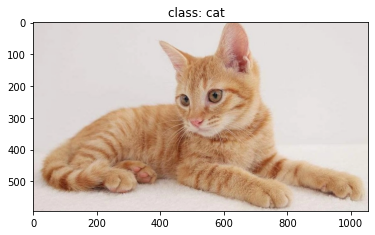

In [45]:
import os
import json

import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

data_transform = transforms.Compose(
    [transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# load image
img_path = "./dataset/cat.webp"
assert os.path.exists(img_path), "file: '{}' dose not exist.".format(img_path)
img = Image.open(img_path)

plt.imshow(img)
# [N, C, H, W]
img = data_transform(img)
# expand batch dimension
img = torch.unsqueeze(img, dim=0)

# read class_indict

class_indict = train_data.class_to_idx
class_indict = {v : k for k, v in class_indict.items()}
# create model
model = LeNet()
model = model.to(device)  # 设置在GPU中训练

# load model weights
weights_path = "./Model/model_30.path"
model.load_state_dict(torch.load(weights_path))

model.eval()
with torch.no_grad():
    # predict class
    output = torch.squeeze(model(img.to(device))).cpu()
    print(type(output))
    predict = torch.max(output, dim=0)[1].item()
    #print(predict.shape)
print(class_indict)
print_res = "class: {}  ".format(class_indict[predict])
plt.title(print_res)
plt.show()
